In [1]:
import numpy as np
from scipy.special import binom

In [25]:
class perc:
    """
    Print the percentage of a certain iteration: construct the class before the iteration and 
    call the method check_and_print at each iteration step.
    The method will print the iteration percentage
    """
    
    def __init__(self, N_iterations, percentage_step=10):
        self.percentage_step = percentage_step
        self.N_iterations = N_iterations
        self.current_percentage = 0
        self.__iteration = 0
    
    def check_and_print(self):
        """
        Call at each iteration.
        current_iteration is the 0 based iteration number
        """
        if (self.__iteration / float(self.N_iterations - 1)) >= self.current_percentage / float(100):
            #print(str(self.current_percentage) + "%", " ", end="")
            print(str(self.current_percentage) + "%")
            self.current_percentage += self.percentage_step
            if self.__iteration == (self.N_iterations - 1):
                print()
        self.__iteration += 1
    
    def reset_perc(self):
        self.current_percentage = 0
        
        
def plot_pmf(values, ax, xlog=False, xlabel='Values', ylog=False, ylabel='pmf', title=None, nbins=10, fonts=12):
    if title != None:
        ax.set_title(title, fontsize=fonts)
    ax.set_xlabel(xlabel, fontsize=fonts)
    ax.set_ylabel(ylabel, fontsize=fonts)
    if ylog:
        ax.set_yscale('log')
    ax.hist(values, bins=nbins)
            
        
def p_law_dist(gamma, n_states):
    alpha = 0
    dist = np.array([])
    for k in range( 1, 1 + n_states ):
        alpha += k**(-gamma)
        dist = np.append(dist, k**(-gamma))
    return dist / alpha


from scipy.stats import rv_discrete

def generate_system_rv(M_list, prob_list, print_perc=True):   
    """
    Random sampling matrix given the probability vector of the component extraction and the object sizes
    """
    N, R = (len(prob_list), len(M_list))
    realizations = np.zeros((N, R))
    discrete_dist = rv_discrete(values=(range(N), prob_list))
    my_perc = perc(R)
    
    for j in range(R):
        for k in range(int(M_list[j])):
            index = discrete_dist.rvs()
            realizations[index,j] += 1
        if print_perc:
            my_perc.check_and_print()
                    
    return realizations

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('./matrix_1112.dat',sep='\t',index_col=0)

In [4]:
df

gv  5Z  mEL  6w  ga  6y  gn  gm  eB  gk ...  4k  4h  4i  4f  OEo  4d  \
XXX                                             ...                            
117074   0   1    0  49   0   0   3   9   0   0 ...   0   0  21   0    0   2   
55347   11  11   10  15   2  10  14  10   8  18 ...  10  16  13   8   18   9   
117070   0   0    0   0   0   0   0   1   0   0 ...   0   0   0   0    0   0   
110009   0   0    0   0   0   0   0   0   0   0 ...   0   0   0   0    0   0   
89372    3   1    0   1   0   0   0   0   0   0 ...   0   0   0   0    0   0   
81406    0   0    0   0   0   0   0   0   0   0 ...   0   0   0   0    0   0   
88713    6  11    4   9   1   4   4  11   9   6 ...   2   6   5   2    9   4   
161270   0   0    0   0   0   0   0   0   0   0 ...   0   0   0   0    0   0   
51269    0   1    0   0   0   0   0   1   1   1 ...   0   0   0   0    1   0   
55298    4   1    1   2   0   2   1   1   4   2 ...   2   2   2   2    2   6   
161070   0   0    1   0   0   0   1   0   1   0 ...   2   0   0   2    2   0   
51261    8   7   10   8   5   2   7   5   7   6 ...   6   6   8   3   11   4   
82199    0   0    0   0   0   0   0   0   0   0 ...   0   0   0   0    1   1   
51069    0   0    0   0   0   0   0   0   0   0 ...   0   0   0   0    0   0   
51064    1   1    1   1   1   1   1   1   1   1 ...   1   1   1   1    1   1   
51283    2   1    0   1   0   0   2   1   1   0 ...   2   2   1   2    0   2   
56235   11   5    6   7   1   5   4   7   7   8 ...   5  14   7   4   13  13   
55909    2   1    0   1   1   1   0   1   2   0 ...   0   2   3   0    2   1   
101498   0   2    0   0   0   1   0   2   1   1 ...   0   0   0   0    1   1   
55904    1   0    0   0   0   0   0   0   1   1 ...   0   0   1   0    2   1   
82220    0   0    0   0   0   0   0   0   0   0 ...   0   0   0   0    0   0   
117782   1   1    0   0   0   0   0   0   1   1 ...   0   0   1   0    1   0   
117892   3   3    0   7   2   3   1   3   2   2 ...   3   1   5   2    1   3   
51604    2   2    1   3   1   3   4   1   3   3 ...   5   4   2   2    3   3   
56059   14  14    8  17   1   5  15  19  17  17 ...  13  19  19   7   19  14   
52009    3   4    2   4   1   1   1   5   7   2 ...   1   3   4   1    3   2   
56053    2   2    2   2   2   2   2   2   2   2 ...   2   2   2   2    2   2   
63737    2   1    0   1   0   0   3   0   0   0 ...   1   2   1   1    0   1   
55831    0   0    1   0   0   0   1   0   0   1 ...   1   1   0   1    1   1   
56831    0   0    0   0   0   0   0   0   0   0 ...   0   0   0   0    0   0   
...     ..  ..  ...  ..  ..  ..  ..  ..  ..  .. ...  ..  ..  ..  ..  ...  ..   
52821    6   8    0  13   1   0   9   8   6  13 ...   5  14   6   3   10  13   
89623    1   1    1   1   0   1   1   2   1   1 ...   3   1   0   0    1   0   
142764   1   0    0   0   0   0   0   0   0   0 ...   3   0   1   0    0   0   
111069   0   0    0   0   0   0   0   0   0   0 ...   0   0   0   0    0   0   
54160    0   0    0   0   0   0   0   0   0   0 ...   0   0   0   0    0   0   
111064   0   0    0   0   0   0   0   0   0   1 ...   0   0   0   0    0   0   
54364    1   1    1   1   1   1   1   1   1   1 ...   1   1   1   1    1   1   
54368    2   1    0   3   0   1   2   1   3   2 ...   1   4   2   0    2   1   
47979    0   1    0   3   0   1   3   1   1   1 ...   0   2   0   0    1   0   
47973    1   1    1   1   1   1   1   1   1   1 ...   1   1   1   1    1   1   
158949   0   0    0   0   0   0   0   0   0   0 ...   0   0   0   0    0   0   
47406    0   0    0   0   0   0   0   0   0   0 ...   0   0   0   0    3   0   
160704   0   0    0   0   0   0   0   0   0   0 ...   0   0   0   0    0   0   
103431   1   0    0   0   0   0   0   0   0   0 ...   0   0   1   0    0   0   
103436   0   0    0   0   0   0   0   0   0   0 ...   0   0   0   0    0   0   
159709   0   0    0   1   0   0   0   0   0   0 ...   0   0   1   0    0   0   
143567   0   0    0   0   0   0   0   0   0   0 ...   0   0   0   0    0   0   
144064  

In [5]:
df_fractions=df.apply(lambda x: x/sum(x),axis=0)

In [6]:
#columns
df_fractions.iloc[:,0].sum()

1.0

In [7]:
#row
df_fractions.iloc[0,:].mean()

0.00020483774483262825

In [8]:
df.shape

(1534, 1112)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 117074 to 50934
Columns: 1112 entries, gv to 4a
dtypes: int64(1112)
memory usage: 13.1 MB


In [10]:
wrong_fract=df.sum()/df.sum().sum()

In [11]:
TOT=df.sum().sum()
fract=df.sum(axis=1)/float(TOT)

In [12]:
len(fract)

1534

In [14]:
from itertools import combinations
import sys

In [52]:
covs=[]
counter=0
top_n=df.shape[0]
TOtal=binom(top_n,2)
print 'Total combinations',TOtal
for i in combinations(df.index,2):
    #print i
    covs.append((df_fractions.loc[i[0]]*df_fractions.loc[i[1]]).mean()-(fract[i[0]]*fract[i[1]]))
    if counter%int(TOtal/100)==0:
        stri='Doing '+str(int(counter/TOtal*100))+' %'
        #print counter, TOtal
        sys.stdout.write('\r'+stri )
        sys.stdout.flush()
    counter+=1

Total combinations 1175811.0
Doing 99 %

In [37]:
RS_mat=generate_system_rv(list(df.sum()),list(fract))

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
()


In [39]:
random_df=RS_mat

In [45]:
random_df=pd.DataFrame(RS_mat,index=df.index,columns=df.columns)

In [46]:
random_df.shape

(1534, 1112)

In [47]:
random_df.head()

gv    5Z  mEL    6w   ga   6y   gn    gm    eB    gk  ...    4k  \
XXX                                                             ...         
117074   1.0   0.0  2.0   3.0  0.0  0.0  0.0   2.0   0.0   1.0  ...   1.0   
55347   21.0  16.0  9.0  16.0  2.0  9.0  7.0  17.0  10.0  18.0  ...   9.0   
117070   0.0   0.0  0.0   0.0  0.0  0.0  1.0   0.0   1.0   0.0  ...   0.0   
110009   0.0   0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0   0.0  ...   0.0   
89372    0.0   0.0  0.0   0.0  1.0  0.0  0.0   1.0   0.0   0.0  ...   0.0   

          4h   4i   4f  OEo    4d  Sgb    4b   4c    4a  
XXX                                                      
117074   4.0  2.0  0.0  0.0   2.0  0.0   5.0  0.0   1.0  
55347   17.0  9.0  6.0  8.0  12.0  9.0  12.0  6.0  19.0  
117070   0.0  1.0  0.0  0.0   1.0  0.0   0.0  0.0   0.0  
110009   0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0  
89372    0.0  1.0  1.0  1.0   0.0  2.0   0.0  0.0   0.0  

[5 rows x 1112 columns]

In [48]:
rand_df_fractions=random_df.apply(lambda x: x/sum(x),axis=0)

In [49]:
rand_df_fractions

gv        5Z       mEL        6w        ga        6y        gn  \
XXX                                                                            
117074  0.000239  0.000000  0.000733  0.000700  0.000000  0.000000  0.000000   
55347   0.005019  0.003738  0.003299  0.003735  0.002227  0.004314  0.002152   
117070  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000307   
110009  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
89372   0.000000  0.000000  0.000000  0.000000  0.001114  0.000000  0.000000   
81406   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
88713   0.001673  0.000234  0.000733  0.002334  0.003341  0.001438  0.000615   
161270  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
51269   0.000239  0.000234  0.000367  0.000000  0.000000  0.000000  0.000000   
55298   0.000478  0.001402  0.000733  0.000934  0.000000  0.001918  0.000615   
161070  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
51261   0.001434  0.001402  0.000367  0.000467  0.000000  0.000479  0.002152   
82199   0.000000  0.000000  0.000000  0.000000  0.000000  0.000479  0.000000   
51069   0.000239  0.000234  0.000000  0.000000  0.000000  0.000000  0.000000   
51064   0.000239  0.000701  0.001100  0.000467  0.000000  0.000000  0.000307   
51283   0.000478  0.000234  0.000367  0.001634  0.001114  0.000000  0.000000   
56235   0.003585  0.001636  0.003299  0.002101  0.000000  0.001438  0.001537   
55909   0.000478  0.000000  0.000367  0.000467  0.000000  0.000000  0.000000   
101498  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000615   
55904   0.000000  0.000234  0.000367  0.000233  0.001114  0.000000  0.000000   
82220   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
117782  0.000239  0.000000  0.000000  0.000000  0.000000  0.000479  0.000000   
117892  0.000956  0.001402  0.000733  0.000934  0.000000  0.000000  0.000615   
51604   0.000956  0.000935  0.001466  0.000233  0.000000  0.000479  0.000615   
56059   0.003824  0.002103  0.004032  0.004669  0.001114  0.003356  0.005841   
52009   0.000478  0.000467  0.000367  0.001401  0.001114  0.000959  0.000615   
56053   0.000239  0.000000  0.000367  0.000934  0.000000  0.000479  0.000922   
63737   0.000478  0.000467  0.000367  0.000467  0.000000  0.000000  0.000307   
55831   0.000000  0.000234  0.000367  0.000233  0.000000  0.000000  0.000000   
56831   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...          ...       ...       ...       ...       ...       ...       ...   
52821   0.001195  0.002103  0.001100  0.001867  0.002227  0.000959  0.002459   
89623   0.000239  0.000000  0.000000  0.000233  0.000000  0.000000  0.000615   
142764  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
111069  0.000000  0.000000  0.000367  0.000000  0.000000  0.000000  0.000000   
54160   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
111064  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
54364   0.000478  0.000234  0.000000  0.000233  0.000000  0.000479  0.000000   
54368   0.000239  0.000467  0.000367  0.000233  0.000000  0.000479  0.000615   
47979   0.000000  0.000234  0.000000  0.000467  0.000000  0.000479  0.000307   
47973   0.000000  0.000467  0.000733  0.000233  0.000000  0.000479  0.000307   
158949  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
47406   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
160704  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
103431  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
103436  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
159709  0.000239  0.000000  0.000000  0.000000  0.000000  0.000000  0.000307   
143567  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
144064  0.0000

In [50]:
rTOT=random_df.sum().sum()
rfract=random_df.sum(axis=1)/float(rTOT)

In [53]:
rcovs=[]
counter=0
rtop_n=df.shape[0]
TOtal=binom(rtop_n,2)
print 'Total combinations',TOtal
for i in combinations(random_df.index,2):
    #print i
    rcovs.append((rand_df_fractions.loc[i[0]]*rand_df_fractions.loc[i[1]]).mean()-(rfract[i[0]]*rfract[i[1]]))
    if counter%int(TOtal/100)==0:
        stri='Doing '+str(int(counter/TOtal*100))+' %'
        #print counter, TOtal
        sys.stdout.write('\r'+stri )
        sys.stdout.flush()
    counter+=1

Total combinations 1175811.0
Doing 99 %

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
sbrange=(-2.5*10**-4,3.5*10**-4)

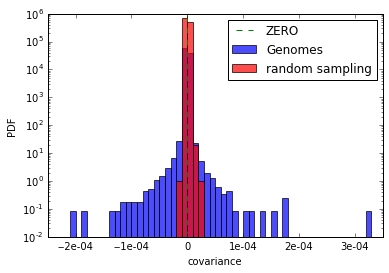

In [61]:
plt.hist(covs,60,label='Genomes',alpha=0.7,normed=True,range=sbrange);
plt.hist(rcovs,60,color='red',label='random sampling',alpha=0.7,range=sbrange);

plt.yscale('log')
#plt.ylim((10**-1,.5*10**9));
plt.xlim(sbrange)
plt.xlabel('covariance');
plt.ylabel('PDF');
plt.axvline(0,color='g', linestyle='--',linewidth=1,label='ZERO');

plt.legend(loc='best');
ax = plt.gca()
ax.get_xaxis().set_major_formatter(plt.LogFormatter(10,  labelOnlyBase=False))

plt.savefig('./plot_genomes.png')

In [87]:
from scipy.stats import ks_2samp
ks_2samp(covs,rcovs)

Ks_2sampResult(statistic=0.12403609083432632, pvalue=0.0)

In [89]:
df.sum().min()

7

In [213]:
from ipywidgets import interact

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models.glyphs import MultiLine
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker,
    PrintfTickFormatter,
    ColorBar,
    

)
output_notebook()

Loading BokehJS ...

In [251]:
from bokeh.palettes import Spectral11

In [252]:
mapper = LinearColorMapper(palette=Spectral11, low=df.sum().min(), high=df.sum().max())

In [260]:
TOOLS = "save,pan,box_zoom,reset,wheel_zoom,crosshair,hover"
p = figure(plot_width=900, plot_height=500,
   tools=TOOLS,
  x_axis_type="log", y_axis_type="log", title="Zipf", 
   x_axis_label='rank', y_axis_label='fraction',y_range=[10**-4, 2*10**-1]
)

source = ColumnDataSource(dict(
        ys=[df_fractions[x].sort_values(ascending=False) for x in df_fractions.columns[::10]],
        xs=[range(1,df_fractions[x].size+1) for x in df_fractions.columns[::10]],
        col=[df[x].sum() for x in df.columns[::10]]
    )
)
 

       
glyph = MultiLine(xs="xs", ys="ys", line_color={'field':'col','transform':mapper}, line_width=2)
p.add_glyph(source, glyph)
        
color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="12pt",
                     ticker=BasicTicker(desired_num_ticks=len(Spectral9)),
                     formatter=PrintfTickFormatter(format="%d"),
                     label_standoff=16, border_line_color=None, location=(0, 0),title='Genome Size')
p.add_layout(color_bar, 'left')

show(p)

In [261]:
TOOLS = "save,pan,box_zoom,reset,wheel_zoom,crosshair,hover"
p2 = figure(plot_width=900, plot_height=500,
   tools=TOOLS,
  x_axis_type="log", y_axis_type="log", title="Zipf", 
   x_axis_label='rank', y_axis_label='fraction',y_range=[10**-4, 2*10**-1]
)

source2 = ColumnDataSource(dict(
        ys=[rand_df_fractions[x].sort_values(ascending=False) for x in rand_df_fractions.columns[::10]],
        xs=[range(1,rand_df_fractions[x].size+1) for x in rand_df_fractions.columns[::10]],
        col=[random_df[x].sum() for x in random_df.columns[::10]]
    )
)
 

       
glyph2 = MultiLine(xs="xs", ys="ys", line_color={'field':'col','transform':mapper}, line_width=2)
p2.add_glyph(source2, glyph2)
        
color_bar2 = ColorBar(color_mapper=mapper, major_label_text_font_size="12pt",
                     ticker=BasicTicker(desired_num_ticks=len(Spectral9)),
                     formatter=PrintfTickFormatter(format="%d"),
                     label_standoff=16, border_line_color=None, location=(0, 0),title='Genome Size')
p2.add_layout(color_bar2, 'left')

show(p2)